In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Importing the dataset
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [3]:
# Implementing UCB
import math
# number of user visits to run through, N
N = 10000
# number of different adverts, d
d = 10
# record of which ad selected in which round
ads_selected = []
# initialise number_of_selections as vector of size d containing only 0s
# records number of times each advert gets selected
numbers_of_selections = [0] * d

# sum_of_rewards records number of times each advert was correctly selected
sums_of_rewards = [0] * d

#total_reward is record of how many correct selections overall
total_reward = 0

In [10]:
#for each round we need to compute average of each ad up to the round
#and also confidence interval of each ad so that we can use max UCB to make selection

#for each round
for n in range(0, N):
	#initialise a variable to represent which ad is selected
    ad = 0
	#and another to record the highest UCB we're able to find (which will be the UCB of the ad to select)
    max_upper_bound = 0
	
	#for each ad
    for i in range(0, d):
		#compute average reward for the ad up to now
		#also compute confidence interval and add to average reward to get UCB
		#but if the ad has never been selected then give it an artificially high UCB
		#this ensures each ad gets selected at least once
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
			#strictly n is one less than number of rounds since it starts at zero so we add 1 to it
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
		#pick the ad with the highest UCB
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    
	#record that we've selected this ad in this round and update its selection count
	ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
	
	#the chosen ad's reward count and total reward go up if the dataset has a 1, otherwise we're adding 0
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward


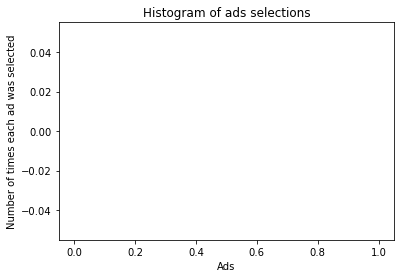

In [8]:
# Visualising the results
# this will show which ad is most successful
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()